link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **PIE CHART**

### melihat perbandingan jenis kelamin yang memiliki diabetes

In [4]:
dfGenderCounts = df['gender'].where(df['diabetes'] == 1).value_counts()
dfGenderCounts

Female    4461
Male      4039
Name: gender, dtype: int64

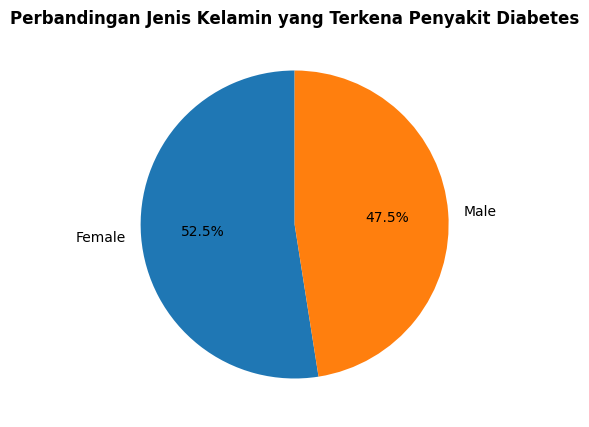

In [5]:
plt.figure(figsize=(5,5))
plt.title("Perbandingan Jenis Kelamin yang Terkena Penyakit Diabetes",
          fontweight='bold')
plt.pie(dfGenderCounts,
        labels=dfGenderCounts.index,
        autopct="%1.1f%%",
        startangle=90)
plt.show()

kesimpulan: wanita lebih banyak memiliki penyakit diabetes dibandingkan dengan pria

# **HEATMAP**

In [6]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


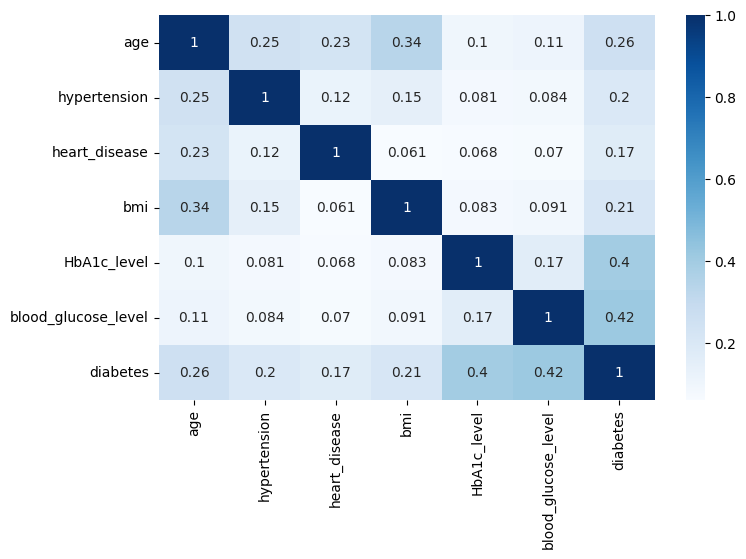

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

kesimpulan: korelasi antar blood_glucose_level dan diabetes cukup tinggi, yaitu sekitar 0.42, sehingga dapat disimpulkan bahwa blood_glucose_level cukup memengaruhi terjadinya penyakit diabetes

# **HISTOGRAM**

In [8]:
dfDiabetes = df.loc[(df['diabetes'] == 1)]
dfDiabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [9]:
dfDiabetes['age'].value_counts()

80.0    1024
62.0     258
61.0     250
66.0     241
67.0     236
        ... 
9.0        4
11.0       2
8.0        1
3.0        1
5.0        1
Name: age, Length: 78, dtype: int64

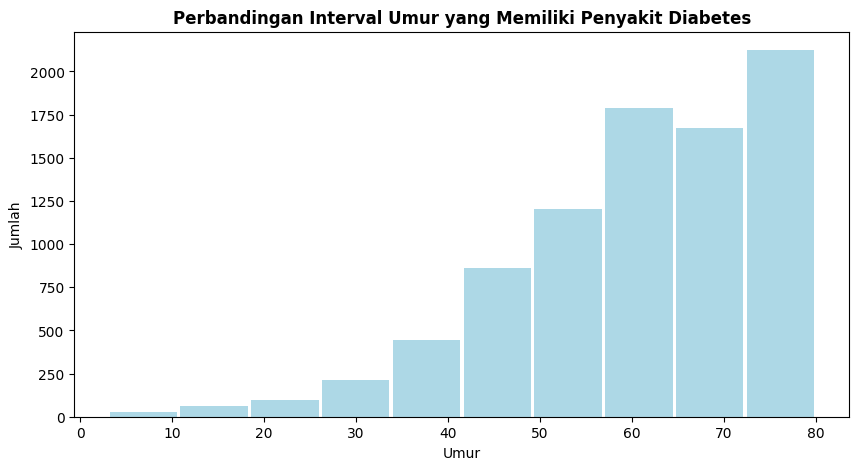

In [10]:
plt.figure(figsize=(10,5))
plt.hist(dfDiabetes['age'], color='lightblue', rwidth=0.95)
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.title('Perbandingan Interval Umur yang Memiliki Penyakit Diabetes', fontweight='bold')
plt.show()

kesimpulan: rentang umur 70-an sampai 80 paling banyak memiliki penyakit diabetes, sedangkan rentang umur di bawah 10 tahun paling sedikit memiliki penyakit diabetes

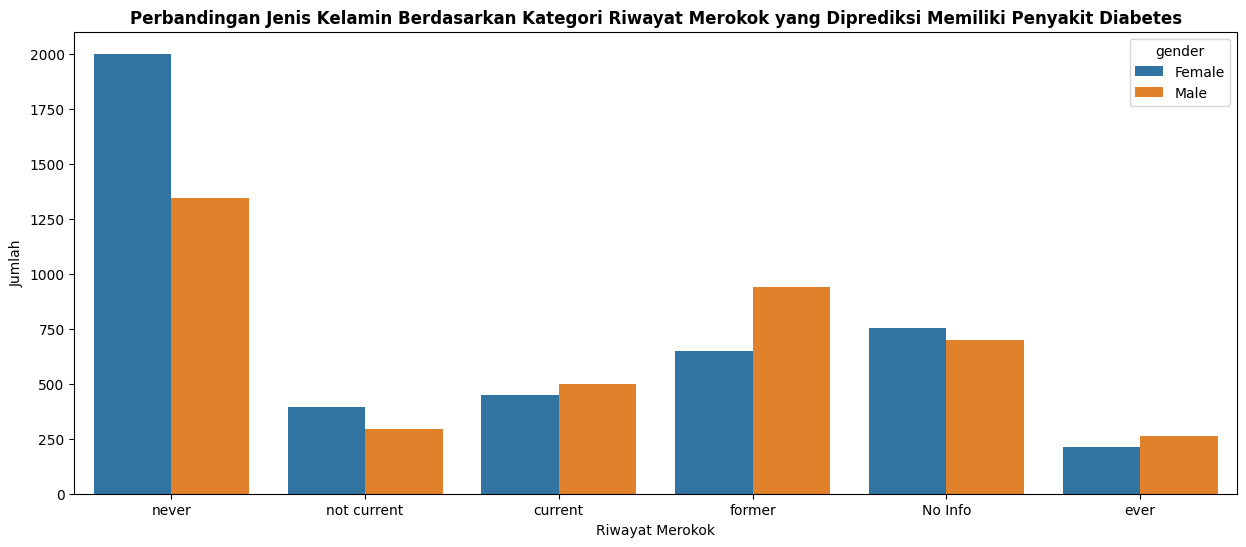

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(data=dfDiabetes, x='smoking_history', hue='gender')
plt.xlabel('Riwayat Merokok')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jenis Kelamin Berdasarkan Kategori Riwayat Merokok yang Diprediksi Memiliki Penyakit Diabetes',
         fontweight='bold')
plt.show()

kesimpulan: riwayat merokok tidak memengaruhi seseorang terkena penyakit diabetes

# **GRAFIK BATANG**

In [38]:
dfHypertension = df.loc[(df['hypertension'] == 1)]
dfHeartDisease = df.loc[(df['heart_disease'] == 1)]
dfBoth = df.loc[(df['heart_disease'] == 1) & (df['hypertension'] == 1)]

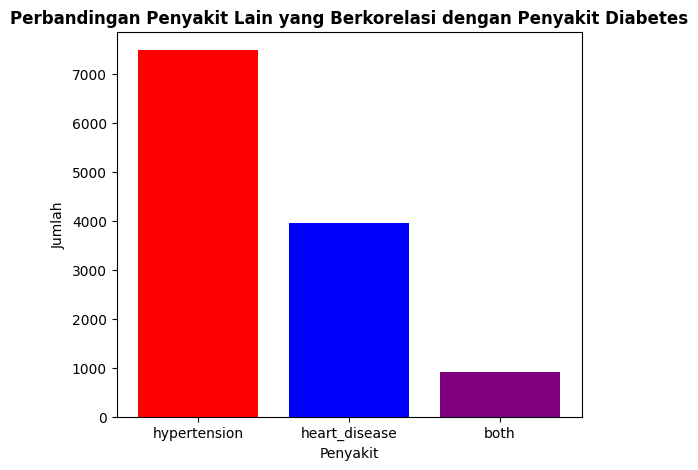

In [42]:
plt.figure(figsize=(6,5))
xlabel = ['hypertension', 'heart_disease', 'both']
ylabel = [dfHypertension.shape[0], dfHeartDisease.shape[0], dfBoth.shape[0]]
plt.bar(xlabel, ylabel, color=['red', 'blue', 'purple'])
plt.xlabel('Penyakit')
plt.ylabel('Jumlah')
plt.title('Perbandingan Penyakit Lain yang Berkorelasi dengan Penyakit Diabetes', fontweight='bold')
plt.show()

kesimpulan: orang dengan hipertensi lebih banyak terkena diabetes dibandingkan orang dengan penyakit jantung. sehingga, hipertensi dapat lebih memicu terjadinya diabetes.